In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the image and convert it to grayscale
path = input("ImagePath: ") or "/Users/rahulr/Downloads/us_images/09-49-17_1.jpg"
image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ImagePath: /Users/rahulr/Downloads/us_images/17-38-18.jpg


In [3]:
threshold = int(input("Threshold Value:") or 60) 

Threshold Value:60


### Original Image

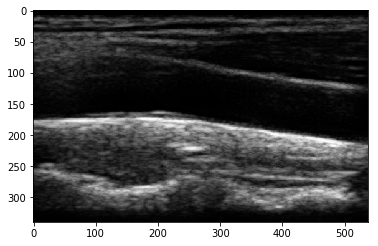

In [4]:
plt.imshow(image)
plt.show()

### Gray Image

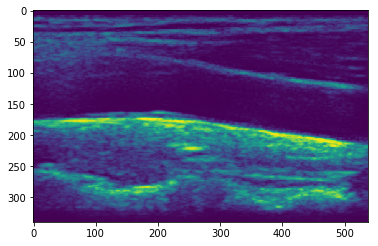

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

### HSV IMAGE

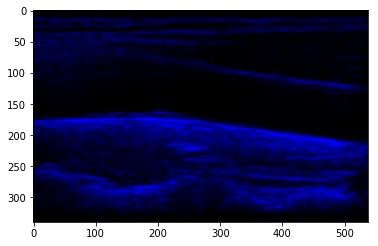

In [6]:
# converting BGR to HSV 
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 
plt.imshow(hsv)
plt.show()

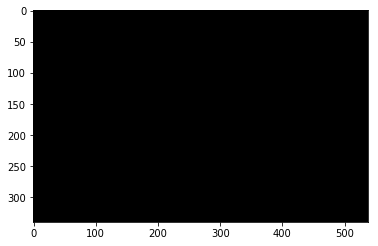

In [7]:
# define range of red color in HSV 
lower_red = np.array([30,150,50]) 
upper_red = np.array([255,255,180]) 

# create a red HSV colour boundary and  
# threshold HSV image 
mask = cv2.inRange(hsv, lower_red, upper_red)

# Bitwise-AND mask and original image 
res = cv2.bitwise_and(image,image, mask= mask) 

plt.imshow(res)
plt.show()

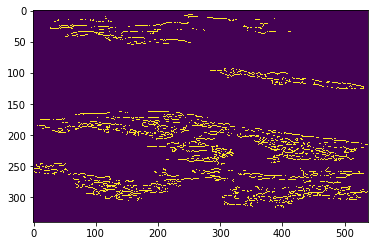

In [8]:
# finds edges in the input image image and 
# marks them in the output map edges 
edges = cv2.Canny(image,50,255) 
plt.imshow(edges)
plt.show()

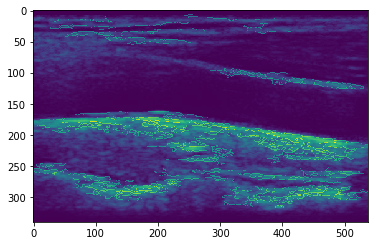

In [9]:
dst = cv2.addWeighted(gray,0.7,edges,0.3,0)
plt.imshow(dst)
plt.show()
cv2.imshow("Out",dst)